In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp, odeint
import scipy.integrate as scint

In [68]:
# -0.1 saddle
# 0.5 focus unstable
# 0.1 focus stable 
# for unstable node : a11 = 0, a12 = 1, a21 = -1, a22 = 3
# for stable node : a11 = 0, a12 = 1, a21 = -1, a22 = -3

def dynamical_model_linear_saddle(X, alpha= -0.1):
    x1, x2 = X
    dx1dt= alpha * x1 + alpha * x2
    dx2dt= -0.25 * x1 
    return [dx1dt,dx2dt]

def dynamical_model_linear_focus_unstable(X, alpha= 0.5):
    x1, x2 = X
    dx1dt= alpha * x1 + alpha * x2
    dx2dt= -0.25 * x1 
    return [dx1dt,dx2dt]

def dynamical_model_linear_focus_stable(X, alpha= 0.1):
    x1, x2 = X
    dx1dt= alpha * x1 + alpha * x2
    dx2dt= -0.25 * x1 
    return [dx1dt,dx2dt]

def dynamical_model_linear_node_unstable(X, alpha= 1):
    x1, x2 = X
    dx1dt= alpha * x2
    dx2dt= -1 * x1 + 3 * x2
    return [dx1dt,dx2dt]

def dynamical_model_linear_node_stable(X, alpha= 1):
    x1, x2 = X
    dx1dt= alpha * x2
    dx2dt= -1 * x1 + -3 * x2
    return [dx1dt,dx2dt]

In [58]:
def plotdf(f,
           xbound,ybound,
           inits=None,
           tmax=10,nsteps=100,tdir="both",
           gridsteps=10,
           parameters = dict(),
           axes = None):

  

    if tdir not in ["forward","backward","both"]:
        raise ValueError("'tdir' must be 'forward', 'backward' or 'both'")

    if axes is None:
        axes = plt.gca()

    x = np.linspace(xbound[0],xbound[1],gridsteps)
    y = np.linspace(ybound[0],ybound[1],gridsteps)
    xx,yy = np.meshgrid(x,y)
    uu = np.empty_like(xx)
    vv = np.empty_like(yy)
    for i in range(gridsteps):
        for j in range(gridsteps):
            res = f(np.array([xx[i,j],yy[i,j]]),**parameters)
            uu[i,j] = res[0]
            vv[i,j] = res[1]

    artists = []
    artists.append(axes.quiver(xx,yy,uu,vv,color="darkred",width=0.002))

    if inits is not None:
        def g(x,t):
            return f(x,**parameters)
        def bg(x,t):
            return -f(x,**parameters)[0], -f(x,**parameters)[1]
        t = np.linspace(0,tmax,nsteps)
        for y0 in inits:
            traj_f = np.empty((0,2))
            traj_b = np.empty((0,2))
            if tdir in ["forward","both"]:
                traj_f = scint.odeint(g,y0,t)
            if tdir in ["backward","both"]:
                traj_b = scint.odeint(bg,y0,t)
            traj = np.vstack((np.flipud(traj_b),traj_f))
            artists.extend(axes.plot(traj[:,0],traj[:,1],linewidth=1.2))
    plt.xlim(xbound)
    plt.ylim(ybound)
    

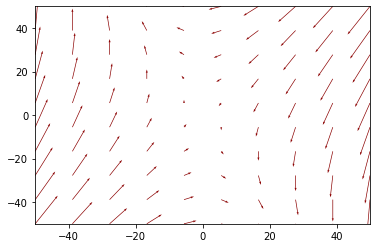

In [63]:
plotdf(dynamical_model_linear_saddle, # Function giving the rhs of the diff. eq. system
         np.array([-50,50]), # [xmin,xmax]
         np.array([-50,50]),# [ymin,ymax]
         #[(1.05,-9),(0,5)] # list of initial values for trajectories (optional)
         )

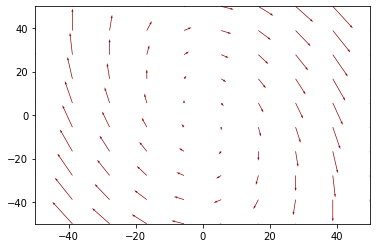

In [64]:
plotdf(dynamical_model_linear_focus_stable, # Function giving the rhs of the diff. eq. system
         np.array([-50,50]), # [xmin,xmax]
         np.array([-50,50]),# [ymin,ymax]
         #[(1.05,-9),(0,5)] # list of initial values for trajectories (optional)
         )

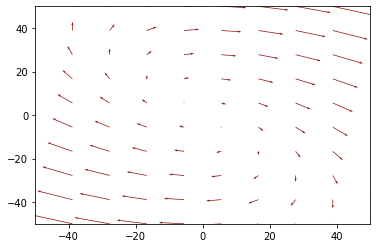

In [69]:
plotdf(dynamical_model_linear_focus_unstable, # Function giving the rhs of the diff. eq. system
         np.array([-50,50]), # [xmin,xmax]
         np.array([-50,50]),# [ymin,ymax]
         #[(1.05,-9),(0,5)] # list of initial values for trajectories (optional)
         )

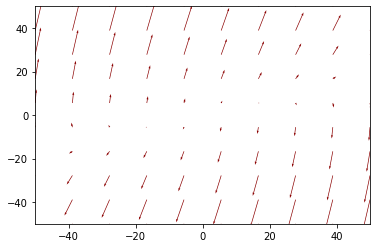

In [70]:
plotdf(dynamical_model_linear_node_unstable, # Function giving the rhs of the diff. eq. system
         np.array([-50,50]), # [xmin,xmax]
         np.array([-50,50]),# [ymin,ymax]
         #[(1.05,-9),(0,5)] # list of initial values for trajectories (optional)
         )

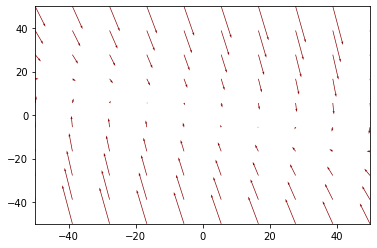

In [71]:
plotdf(dynamical_model_linear_node_stable, # Function giving the rhs of the diff. eq. system
         np.array([-50,50]), # [xmin,xmax]
         np.array([-50,50]),# [ymin,ymax]
         #[(1.05,-9),(0,5)] # list of initial values for trajectories (optional)
         )


In [ ]:
# If number f Re(eigvalues)>0 and Re(eigenvalues) < 0 is equal then topologically equivalent.